In [1]:
import re
import os
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import hvplot.pandas
%matplotlib inline 

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
df_acp = pd.read_csv("accepted_2007_to_2018Q4.csv")

C:\Users\Admin\AppData\Local\Temp\ipykernel_16128\2215960345.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df_acp = pd.read_csv("accepted_2007_to_2018Q4.csv")


In [5]:
chunk_size = 10000  # Adjust the chunk size according to your needs
filename = 'large_file.csv'

# Initialize an empty list to store the data chunks
chunks = []

# Read the file in chunks
for chunk in pd.read_csv("accepted_2007_to_2018Q4.csv", chunksize=chunk_size):
    # Process each chunk here
    chunks.append(chunk)

# Concatenate all chunks into a single DataFrame if needed
df = pd.concat(chunks, ignore_index=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16128\1733499222.py:8: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv("accepted_2007_to_2018Q4.csv", chunksize=chunk_size):
C:\Users\Admin\AppData\Local\Temp\ipykernel_16128\1733499222.py:8: DtypeWarning: Columns (19,59) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv("accepted_2007_to_2018Q4.csv", chunksize=chunk_size):
C:\Users\Admin\AppData\Local\Temp\ipykernel_16128\1733499222.py:8: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv("accepted_2007_to_2018Q4.csv", chunksize=chunk_size):
C:\Users\Admin\AppData\Local\Temp\ipykernel_16128\1733499222.py:8: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv("accepted_2007_to_2018Q4.csv", chunksize=chunk_size):
C

C:\Users\Admin\AppData\Local\Temp\ipykernel_16128\2436331319.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
d:\Annaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\AppData\Local\Temp\ipykernel_16128\2436331319.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
simi

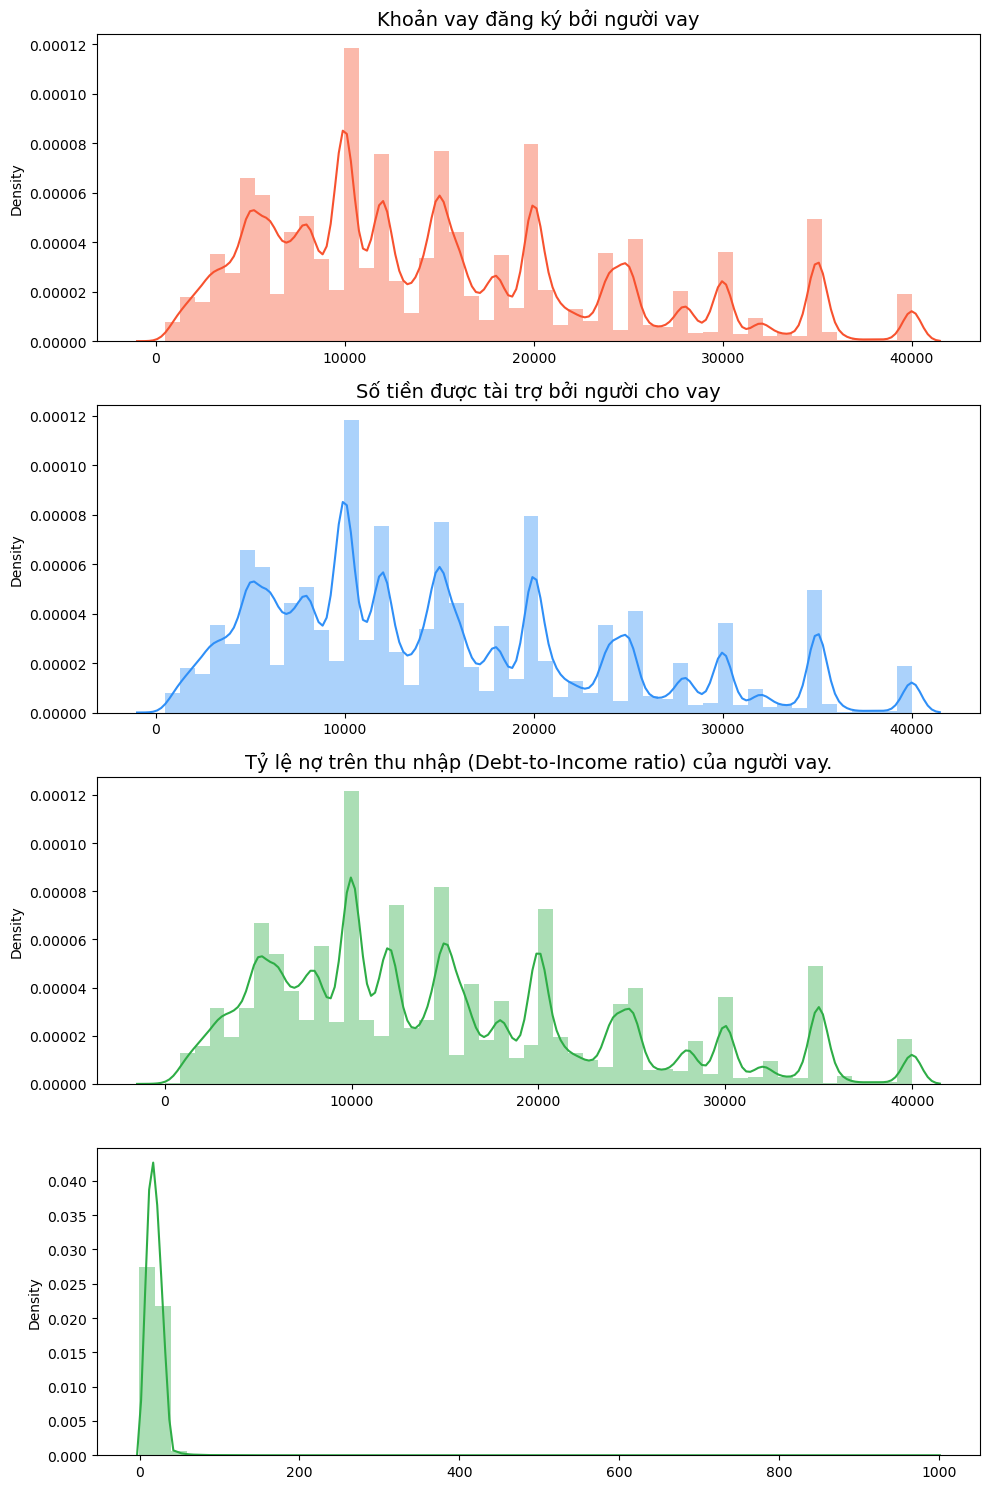

In [8]:

loan_amount = df_acp["loan_amnt"].values
funded_amount = df_acp["funded_amnt"].values
investor_funds = df_acp["funded_amnt_inv"].values
dti = df_acp['dti'].values
# Giả sử loan_amount, funded_amount, và investor_funds đã được định nghĩa từ trước

fig, ax = plt.subplots(4, 1, figsize=(10, 15))

sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Khoản vay đăng ký bởi người vay", fontsize=14)

sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Số tiền được tài trợ bởi người cho vay", fontsize=14)

sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Tổng số tiền cam kết bởi nhà đầu tư", fontsize=14)

sns.distplot(dti, ax=ax[3], color="#2EAD46")
ax[2].set_title("Tỷ lệ nợ trên thu nhập (Debt-to-Income ratio) của người vay.", fontsize=14)

plt.tight_layout()
plt.show()


In [9]:
# Lets' transform the issue dates by year.
df_acp['issue_d'].head()
dt_series = pd.to_datetime(df['issue_d'])
df_acp['year'] = dt_series.dt.year

C:\Users\Admin\AppData\Local\Temp\ipykernel_16128\3760955302.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt_series = pd.to_datetime(df['issue_d'])


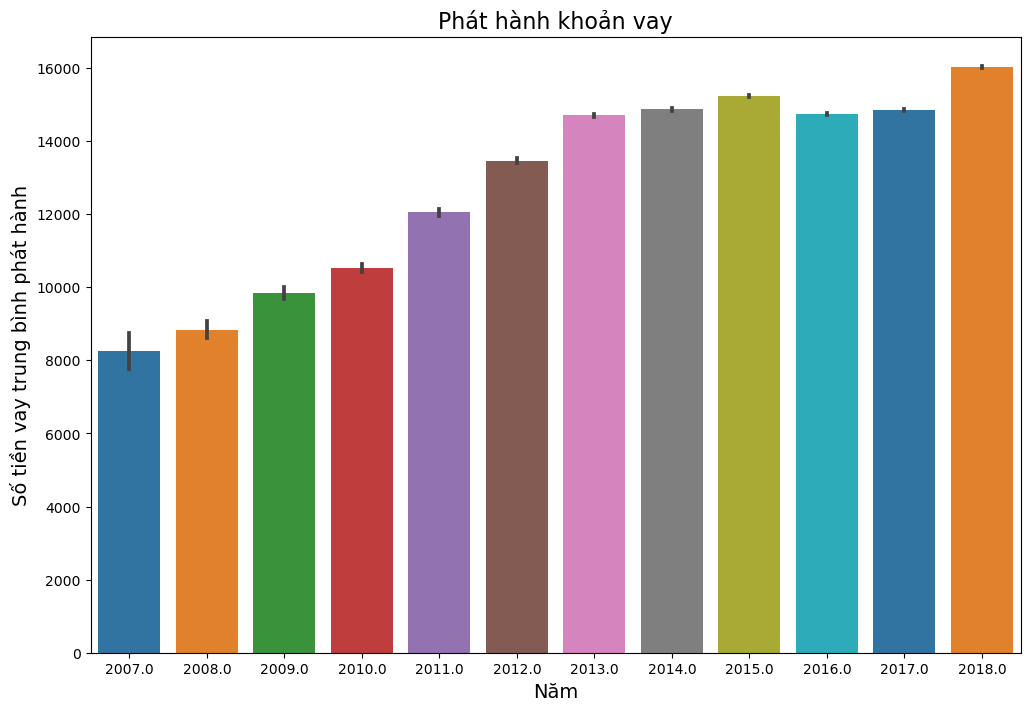

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.barplot(x='year', y='loan_amnt', data=df_acp, palette='tab10')
plt.title('Phát hành khoản vay', fontsize=16)
plt.xlabel('Năm', fontsize=14)
plt.ylabel('Số tiền vay trung bình phát hành', fontsize=14)
plt.show()


In [11]:
# Missing values
for column in df_acp.columns:
    if df_acp[column].isna().sum() != 0:
        missing = df_acp[column].isna().sum()
        portion = (missing / df_acp.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'member_id': number of missing values '2260701' ==> '100.000%'
'loan_amnt': number of missing values '33' ==> '0.001%'
'funded_amnt': number of missing values '33' ==> '0.001%'
'funded_amnt_inv': number of missing values '33' ==> '0.001%'
'term': number of missing values '33' ==> '0.001%'
'int_rate': number of missing values '33' ==> '0.001%'
'installment': number of missing values '33' ==> '0.001%'
'grade': number of missing values '33' ==> '0.001%'
'sub_grade': number of missing values '33' ==> '0.001%'
'emp_title': number of missing values '167002' ==> '7.387%'
'emp_length': number of missing values '146940' ==> '6.500%'
'home_ownership': number of missing values '33' ==> '0.001%'
'annual_inc': number of missing values '37' ==> '0.002%'
'verification_status': number of missing values '33' ==> '0.001%'
'issue_d': number of missing values '33' ==> '0.001%'
'loan_status': number of missing values '33' ==> '0.001%'
'pymnt_plan': number of missing values '33' ==> '0.001%'
'url': number o

In [12]:
# Define the threshold for missing values
threshold = 0.8

# Calculate the proportion of missing values for each column
missing_proportion = df_acp.isna().mean()

# Filter columns that have less than or equal to 80% missing values
filtered_df = df_acp.loc[:, missing_proportion <= threshold]

# Print the resulting DataFrame
print(filtered_df)


                                                       id  loan_amnt  \
0                                                68407277     3600.0   
1                                                68355089    24700.0   
2                                                68341763    20000.0   
3                                                66310712    35000.0   
4                                                68476807    10400.0   
...                                                   ...        ...   
2260696                                          88985880    40000.0   
2260697                                          88224441    24000.0   
2260698                                          88215728    14000.0   
2260699  Total amount funded in policy code 1: 1465324575        NaN   
2260700   Total amount funded in policy code 2: 521953170        NaN   

         funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0             3600.0           3600.0   36 months     13.99

In [13]:
# Chọn các cột đã liệt kê
columns = ['annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 
           'fico_range_high', 'fico_range_low', 'home_ownership', 'id', 
           'initial_list_status', 'int_rate', 'loan_amnt', 'loan_status', 
           'mort_acc', 'open_acc', 'pub_rec', 'purpose', 'revol_bal', 
           'revol_util', 'sub_grade', 'term', 'verification_status']

df = df_acp[columns]
sample_df = df.sample(n=1000, random_state=42)
# Xử lý missing values (giá trị thiếu)
sample_df = sample_df.dropna()
categorical_columns = ['application_type', 'earliest_cr_line', 'emp_length', 
                       'home_ownership', 'initial_list_status', 'purpose', 
                       'sub_grade', 'term', 'verification_status']
for column in categorical_columns:
    sample_df[column] = sample_df[column].astype(str)
# Mã hóa các biến phân loại (categorical variables)
le = LabelEncoder()

for column in categorical_columns:
    sample_df[column] = le.fit_transform(sample_df[column])

In [14]:
X = sample_df.drop('loan_status', axis=1)
y = sample_df['loan_status']

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Khởi tạo và huấn luyện mô hình
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# # Đánh giá mô hình
# accuracy = accuracy_score(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, y_prob)

# print(f'Accuracy: {accuracy}')
# print(f'ROC AUC: {roc_auc}')

In [16]:
# Lấy importance của các cột
feature_importances = model.feature_importances_

# Tạo DataFrame để xem importance của các cột
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sắp xếp theo thứ tự giảm dần
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Hiển thị các cột quan trọng
print(importance_df)


                Feature  Importance
8                    id    0.268805
2                   dti    0.069731
17           revol_util    0.061386
3      earliest_cr_line    0.054157
16            revol_bal    0.053995
10             int_rate    0.053695
0            annual_inc    0.053376
11            loan_amnt    0.051311
13             open_acc    0.046142
18            sub_grade    0.045430
6        fico_range_low    0.038377
5       fico_range_high    0.038306
4            emp_length    0.033913
19                 term    0.027447
12             mort_acc    0.025652
20  verification_status    0.018812
15              purpose    0.017116
9   initial_list_status    0.014226
7        home_ownership    0.012428
14              pub_rec    0.010273
1      application_type    0.005424


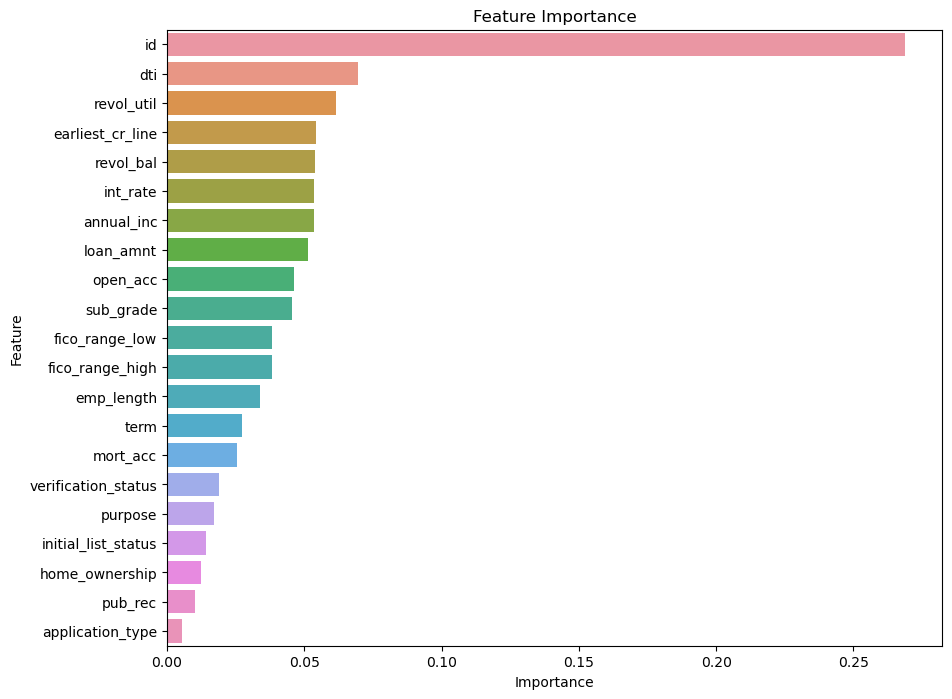

In [17]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [18]:
selected_columns = ['loan_amnt','loan_status','term','int_rate','num_op_rev_tl',
                    'sub_grade','home_ownership','annual_inc','purpose','bc_open_to_buy',
                   'addr_state','dti','delinq_2yrs','earliest_cr_line','fico_range_low','fico_range_high',
                   'open_acc', 'total_acc','pub_rec','revol_bal','mort_acc']
df1 = df_acp[selected_columns]

In [19]:
df1.shape

(2260701, 21)

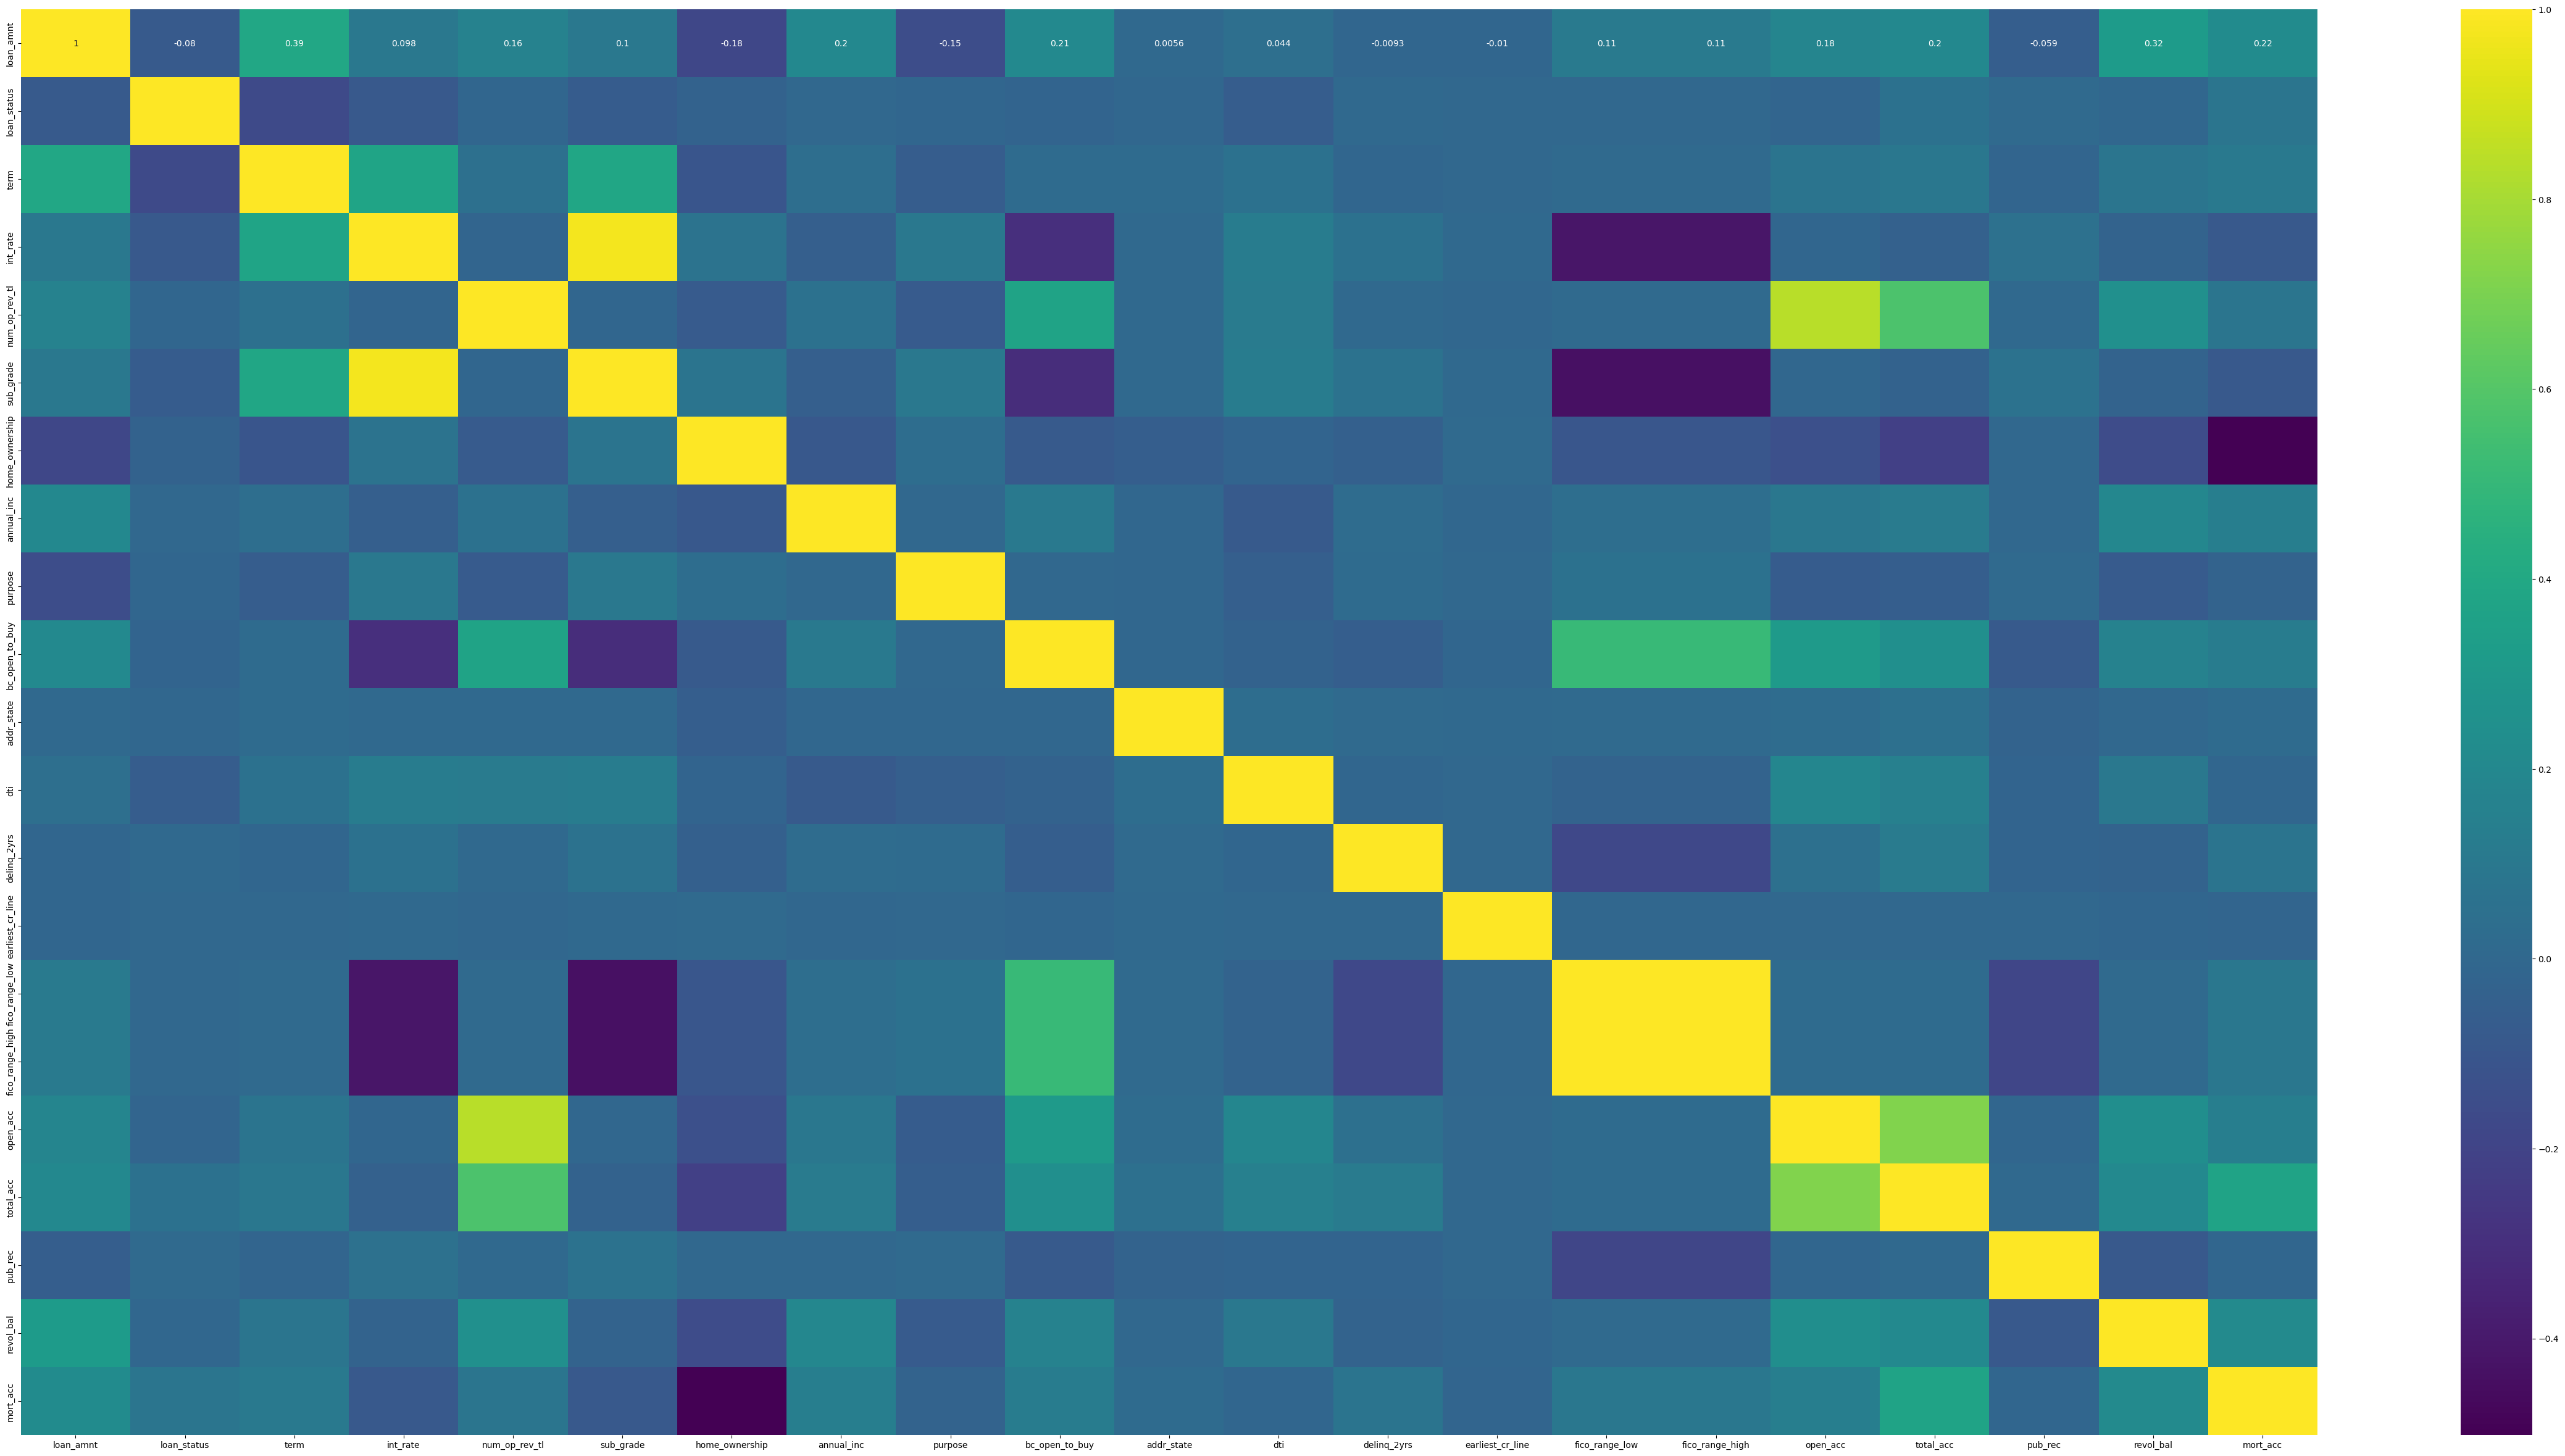

In [20]:
from sklearn.preprocessing import LabelEncoder

# Tạo một bản sao của DataFrame để thực hiện chuyển đổi
df_encoded = df1.copy()

# Duyệt qua từng cột trong DataFrame
for col in df_encoded.columns:
    # Kiểm tra xem cột có phải là dữ liệu chữ không
    if df_encoded[col].dtype == 'object':
        # Sử dụng LabelEncoder để chuyển đổi giá trị chữ sang số
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

# Vẽ heatmap cho DataFrame đã chuyển đổi
plt.figure(figsize=(60, 30))
sns.heatmap(df_encoded.corr(), annot=True, cmap='viridis')
plt.show()


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 21 columns):
 #   Column            Dtype  
---  ------            -----  
 0   loan_amnt         float64
 1   loan_status       object 
 2   term              object 
 3   int_rate          float64
 4   num_op_rev_tl     float64
 5   sub_grade         object 
 6   home_ownership    object 
 7   annual_inc        float64
 8   purpose           object 
 9   bc_open_to_buy    float64
 10  addr_state        object 
 11  dti               float64
 12  delinq_2yrs       float64
 13  earliest_cr_line  object 
 14  fico_range_low    float64
 15  fico_range_high   float64
 16  open_acc          float64
 17  total_acc         float64
 18  pub_rec           float64
 19  revol_bal         float64
 20  mort_acc          float64
dtypes: float64(14), object(7)
memory usage: 362.2+ MB


In [22]:
missing_data = df1.isnull().sum()
print(missing_data)

loan_amnt              33
loan_status            33
term                   33
int_rate               33
num_op_rev_tl       70309
sub_grade              33
home_ownership         33
annual_inc             37
purpose                33
bc_open_to_buy      74968
addr_state             33
dti                  1744
delinq_2yrs            62
earliest_cr_line       62
fico_range_low         33
fico_range_high        33
open_acc               62
total_acc              62
pub_rec                62
revol_bal              33
mort_acc            50063
dtype: int64


In [23]:
df1 = df1.dropna()

In [24]:
df1.sample(3).transpose()

,1789996,907651,2139266
loan_amnt,21725.0,18300.0,7800.0
loan_status,Fully Paid,Current,Current
term,60 months,36 months,36 months
int_rate,24.08,10.42,7.07
num_op_rev_tl,10.0,7.0,9.0
sub_grade,F2,B3,A2
home_ownership,MORTGAGE,RENT,MORTGAGE
annual_inc,90000.0,53000.0,180000.0
purpose,other,debt_consolidation,credit_card
bc_open_to_buy,6403.0,1983.0,61128.0


In [25]:
valid_statuses = ['Fully Paid','Charged Off']
df1 = df1[df1['loan_status'].isin(valid_statuses)]

In [26]:
df1.loan_status.value_counts()

loan_status
Fully Paid     1008534
Charged Off     255293
Name: count, dtype: int64

## Tạo các Map để chuyển đôi dữ liệu:

In [27]:
# Map loan_status
status_mapping = {
    'Fully Paid': 1,
    'Charged Off': 0
}

df1['loan_status'] = df1['loan_status'].map(status_mapping)
# Map addr_state
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

df1['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    
df1['region'] = df1['addr_state'].apply(finding_regions)

In [28]:
df1['loan_status'].value_counts()

loan_status
1    1008534
0     255293
Name: count, dtype: int64

In [29]:
df1.drop(['addr_state'], axis=1, inplace=True)

### Xử lý chỉ số Fico

In [30]:
df1[['fico_range_low','fico_range_high']].corr()

,fico_range_low,fico_range_high
fico_range_low,1.0,1.0
fico_range_high,1.0,1.0


In [31]:
df1['fico_score'] = 0.5*df1['fico_range_low'] + 0.5*df1['fico_range_high']

In [32]:
df1.drop(['fico_range_high', 'fico_range_low'], axis=1, inplace=True)

### Xử lý các chỉ số

In [33]:
df1 = df1.dropna(subset=['total_acc','open_acc'])

In [34]:
df1['term']

0           36 months
1           36 months
2           60 months
4           60 months
5           36 months
              ...    
2260688     60 months
2260690     60 months
2260691     60 months
2260692     60 months
2260697     60 months
Name: term, Length: 1263827, dtype: object

In [36]:
import hvplot.pandas  # Import hvplot.pandas to enable hvplot on Pandas objects

numeric_columns = df1.select_dtypes(include='number')
correlation_series = numeric_columns.corr()['mort_acc'].drop('mort_acc').sort_values()
correlation_series.hvplot.barh()


:Bars   [index]   (mort_acc)

In [37]:
# Convert 'mort_acc' column to numeric type, coercing errors to NaN
df1['mort_acc'] = pd.to_numeric(df1['mort_acc'], errors='coerce')
 
# Calculate the average of 'mort_acc' grouped by 'total_acc'
total_acc_avg = df1.groupby(by='total_acc')['mort_acc'].mean()

In [38]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [39]:
df1['mort_acc'] = df1.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [40]:
df1.groupby('loan_status')['dti'].describe()
#Các khoản vay đã hoàn thành được tính phí có xu hướng có tỷ lệ nợ trên thu nhập cao hơn.

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,255293.0,20.377036,11.930955,0.0,13.74,19.98,26.56,999.0
1,1008534.0,18.023527,11.095119,-1.0,11.60,17.30,23.71,999.0


- Những người nộp đơn có tới 20% DTI đang trả lại các khoản vay thường xuyên hơn. So sánh DTI thấp với những người nộp đơn có DTI cao, chúng ta có thể thấy rằng những người nộp đơn có DTI cao có khả năng bị tính phí cao hơn tới 200%!

In [41]:
# Xử lý revol_util
# df1['revol_util'] = df1['revol_util'].fillna(df1['revol_util'].mean())

In [42]:
# Xử lý dti
df1 = df1.dropna(subset=['dti'])

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1263827 entries, 0 to 2260697
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   loan_amnt         1263827 non-null  float64
 1   loan_status       1263827 non-null  int64  
 2   term              1263827 non-null  object 
 3   int_rate          1263827 non-null  float64
 4   num_op_rev_tl     1263827 non-null  float64
 5   sub_grade         1263827 non-null  object 
 6   home_ownership    1263827 non-null  object 
 7   annual_inc        1263827 non-null  float64
 8   purpose           1263827 non-null  object 
 9   bc_open_to_buy    1263827 non-null  float64
 10  dti               1263827 non-null  float64
 11  delinq_2yrs       1263827 non-null  float64
 12  earliest_cr_line  1263827 non-null  object 
 13  open_acc          1263827 non-null  float64
 14  total_acc         1263827 non-null  float64
 15  pub_rec           1263827 non-null  float64
 16  revol

In [44]:
df1['home_ownership'].value_counts()

home_ownership
MORTGAGE    628372
RENT        497150
OWN         137938
ANY            279
NONE            44
OTHER           44
Name: count, dtype: int64

In [45]:
df1['home_ownership'] = df1['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [46]:
df1['earliest_cr_line'] = df1['earliest_cr_line'].apply(lambda s: int(s[-4:]))

In [47]:
df1['earliest_cr_line'].describe()

count    1.263827e+06
mean     1.998774e+03
std      7.640758e+00
min      1.934000e+03
25%      1.995000e+03
50%      2.000000e+03
75%      2.004000e+03
max      2.015000e+03
Name: earliest_cr_line, dtype: float64

### Remove outlier

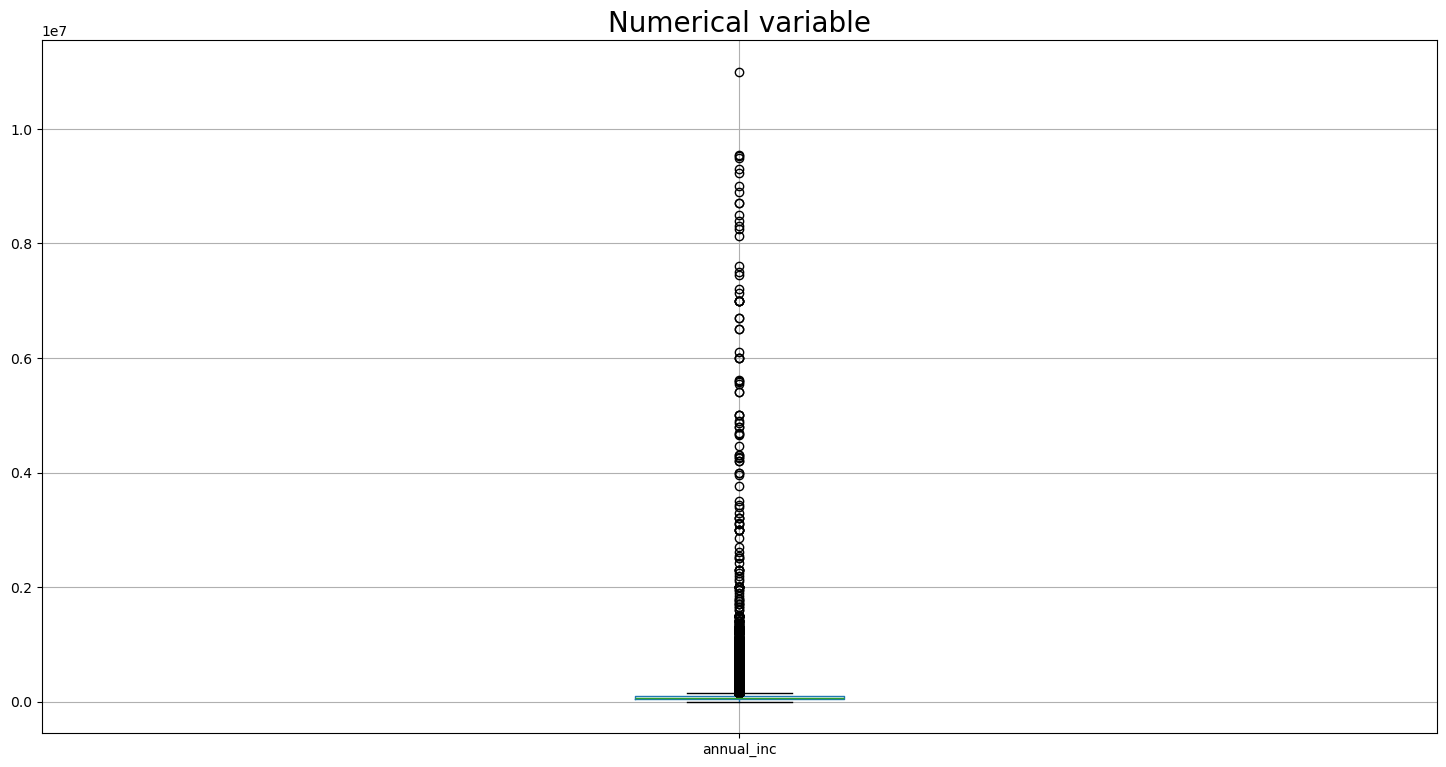

In [48]:
num_cols = ['annual_inc']
plt.figure(figsize=(18,9))
df1[num_cols].boxplot()
plt.title("Numerical variable", fontsize=20)
plt.show()

In [49]:
#remove outlier "annual income"
df1 = df1[(df1['annual_inc'] <=300000)]

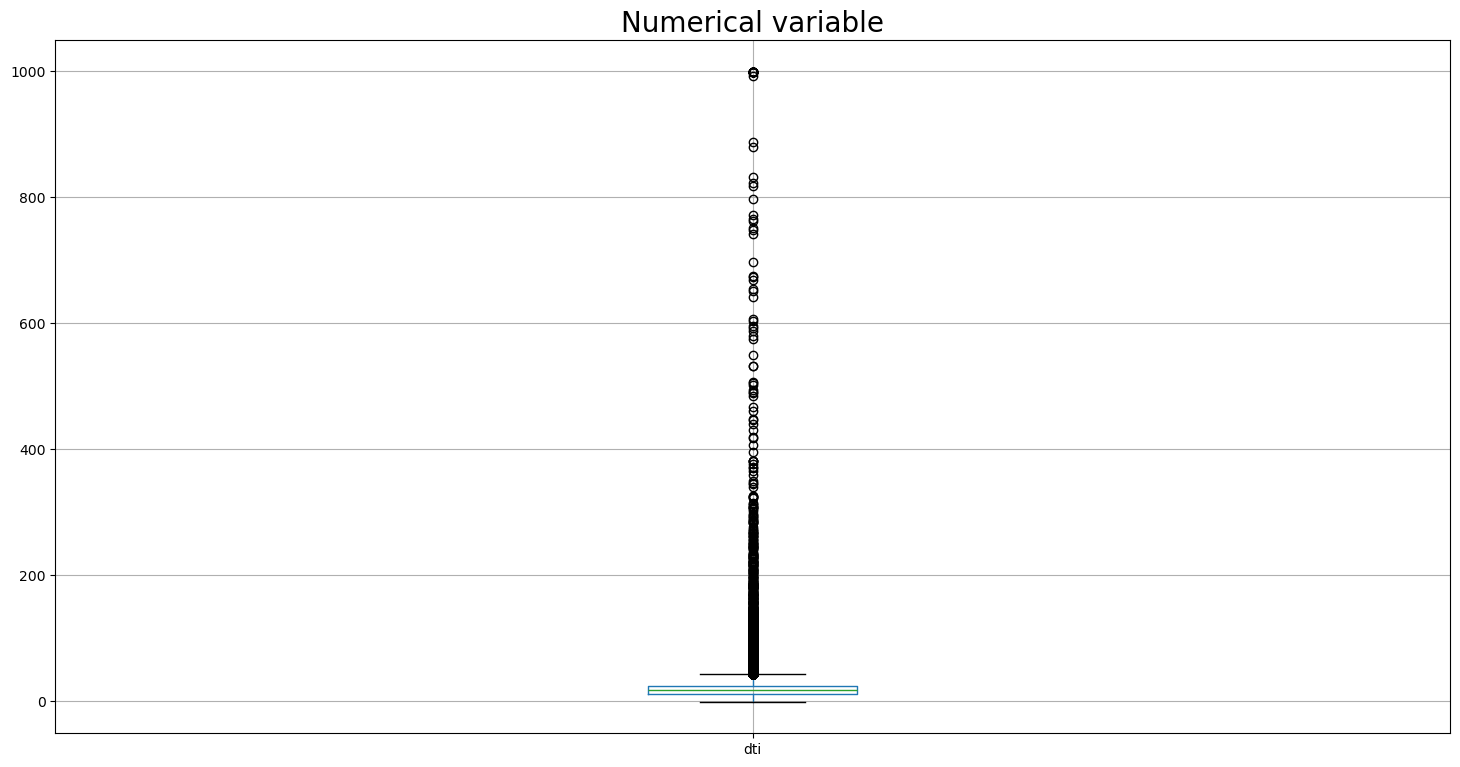

In [50]:
num_cols = ['dti']
plt.figure(figsize=(18,9))
df1[num_cols].boxplot()
plt.title("Numerical variable", fontsize=20)
plt.show()

In [51]:
#remove outlier 
df1 = df1[(df1['dti'] <=50)]

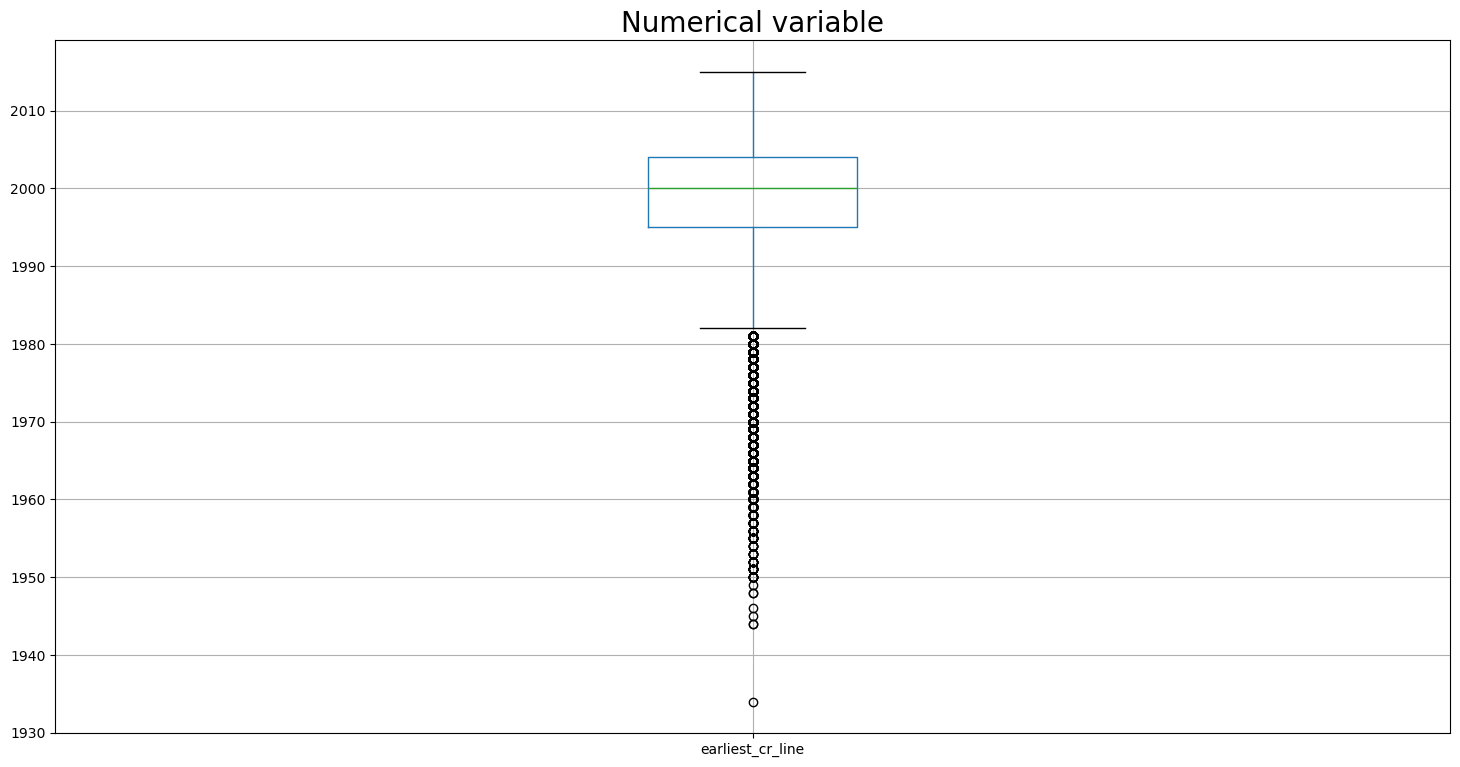

In [52]:
num_cols = ['earliest_cr_line']
plt.figure(figsize=(18,9))
df1[num_cols].boxplot()
plt.title("Numerical variable", fontsize=20)
plt.show()

In [53]:
#remove outlier 
df1 = df1[(df1['earliest_cr_line'] >=1985)]

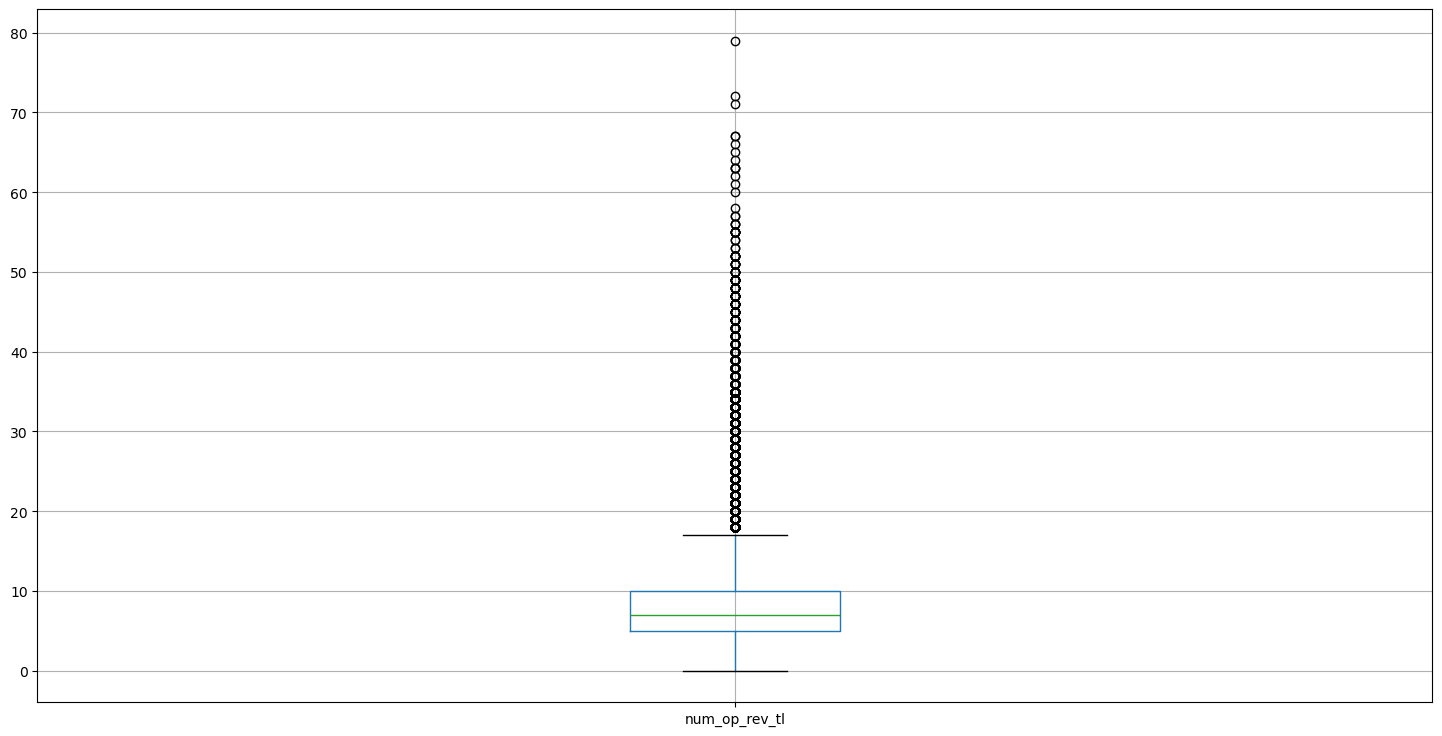

In [56]:
num_cols = ['num_op_rev_tl']
plt.figure(figsize=(18,9))
df1[num_cols].boxplot()
plt.show()

In [57]:
#remove outlier 
df1 = df1[(df1['num_op_rev_tl'] <=30)]

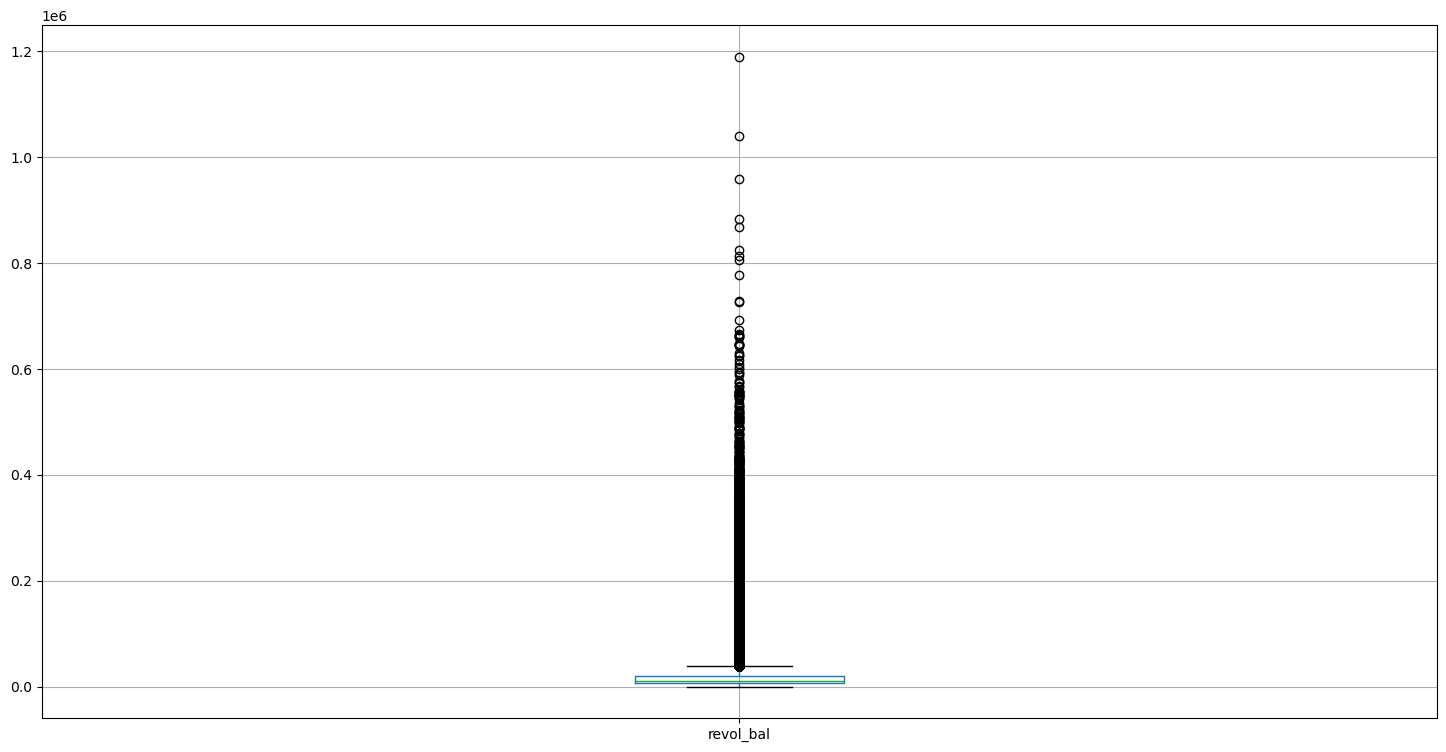

In [58]:
num_cols = ['revol_bal']
plt.figure(figsize=(18,9))
df1[num_cols].boxplot()
plt.show()

In [59]:
#remove outlier 
df1 = df1[(df1['revol_bal'] <=300000)]

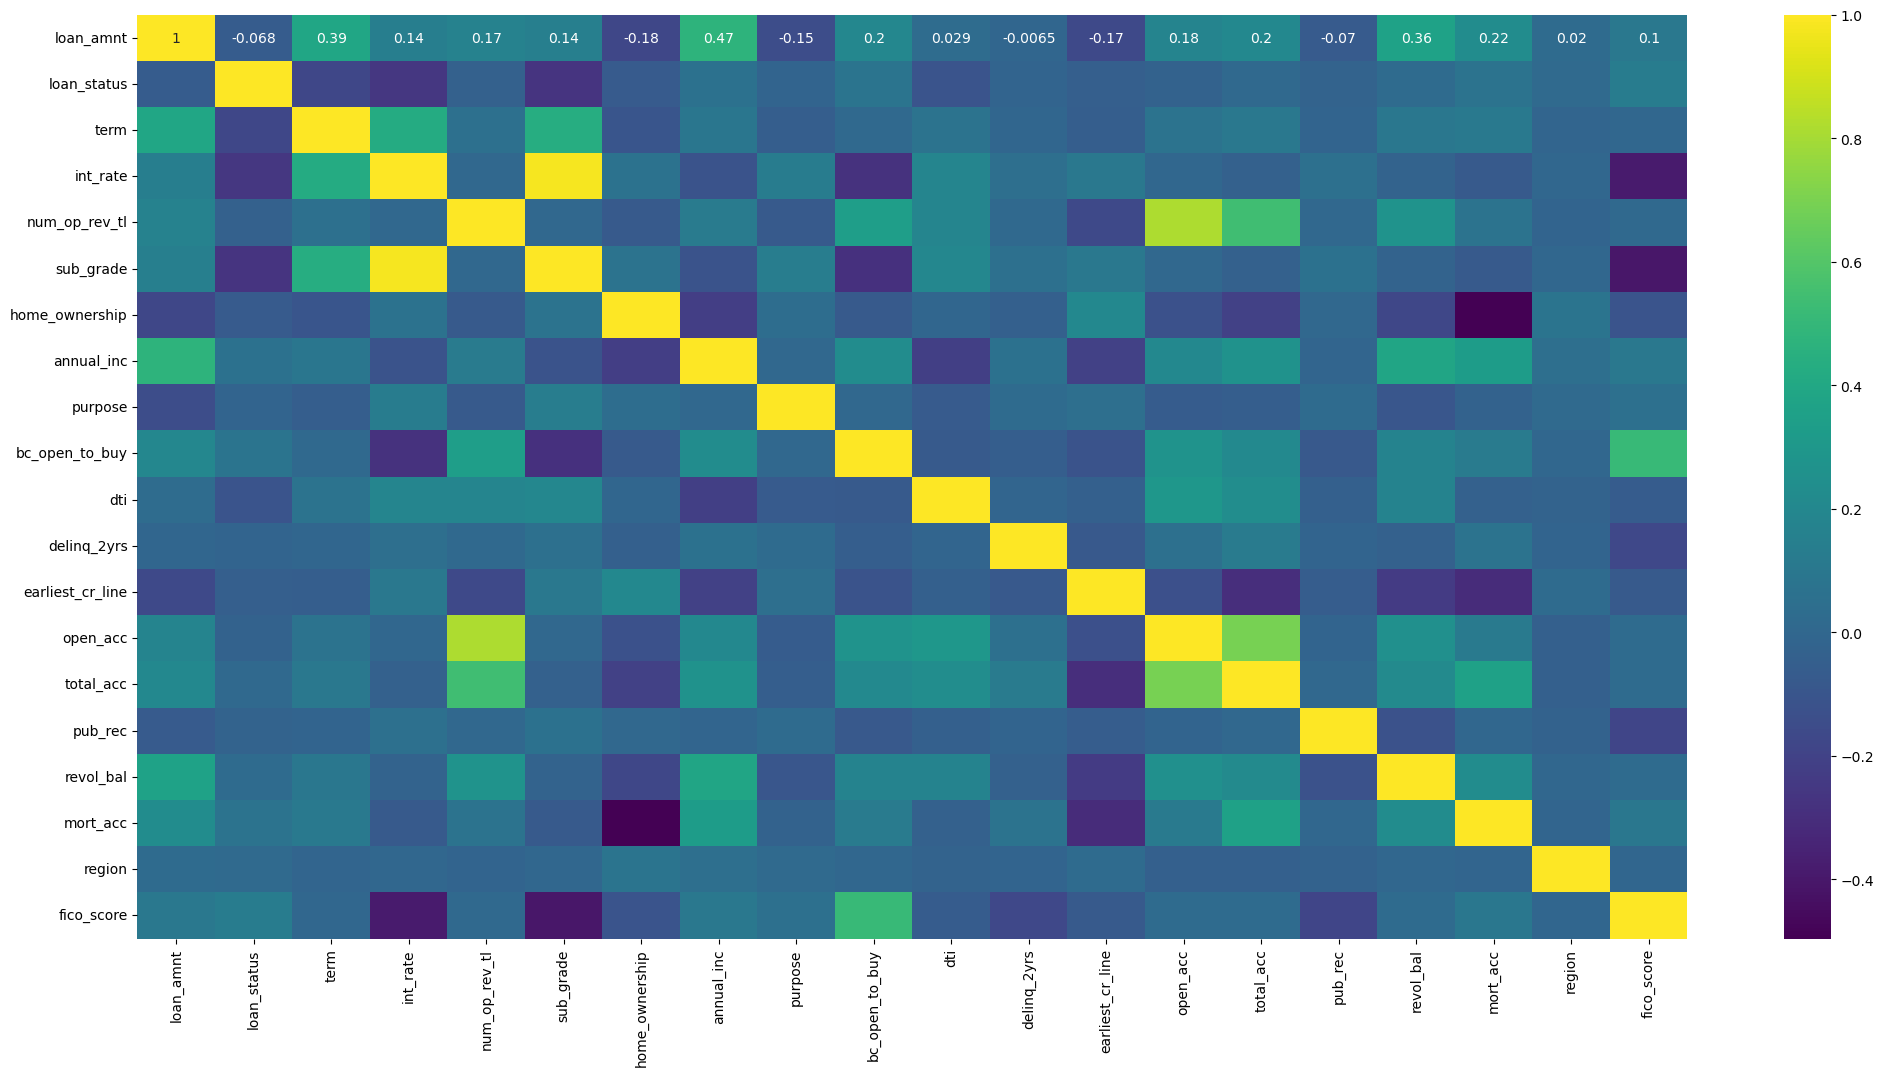

In [60]:
from sklearn.preprocessing import LabelEncoder

# Tạo một bản sao của DataFrame để thực hiện chuyển đổi
df_encoded = df1.copy()

# Duyệt qua từng cột trong DataFrame
for col in df_encoded.columns:
    # Kiểm tra xem cột có phải là dữ liệu chữ không
    if df_encoded[col].dtype == 'object':
        # Sử dụng LabelEncoder để chuyển đổi giá trị chữ sang số
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

# Vẽ lại heatmap cho DataFrame đã chuyển đổi
plt.figure(figsize=(25, 12))
sns.heatmap(df_encoded.corr(), annot=True, cmap='viridis')
plt.show()


In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1185356 entries, 0 to 2260697
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   loan_amnt         1185356 non-null  float64
 1   loan_status       1185356 non-null  int64  
 2   term              1185356 non-null  object 
 3   int_rate          1185356 non-null  float64
 4   num_op_rev_tl     1185356 non-null  float64
 5   sub_grade         1185356 non-null  object 
 6   home_ownership    1185356 non-null  object 
 7   annual_inc        1185356 non-null  float64
 8   purpose           1185356 non-null  object 
 9   bc_open_to_buy    1185356 non-null  float64
 10  dti               1185356 non-null  float64
 11  delinq_2yrs       1185356 non-null  float64
 12  earliest_cr_line  1185356 non-null  int64  
 13  open_acc          1185356 non-null  float64
 14  total_acc         1185356 non-null  float64
 15  pub_rec           1185356 non-null  float64
 16  revol

In [62]:
df1.drop(['open_acc'], axis=1, inplace=True)

In [63]:
df1.shape

(1185356, 19)

### Dummies dữ liệu

In [64]:
term_values = {' 36 months': 36, ' 60 months': 60}
df1['term'] = df1.term.map(term_values)

In [65]:
dummies = ['sub_grade','region', 'purpose', 'home_ownership']
df1 = pd.get_dummies(df1, columns=dummies, drop_first=True)

In [66]:
df1.shape

(1185356, 69)

In [67]:
df1.loan_status.value_counts()

loan_status
1    944070
0    241286
Name: count, dtype: int64

In [68]:
len(df1['loan_status'])
# Loan Ratios (Imbalanced classes)
df1['loan_status'].value_counts()/len(df1['loan_status']) * 100

loan_status
1    79.644427
0    20.355573
Name: count, dtype: float64

## Train model LogisticRegression

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [70]:
df1['term']

0          36
1          36
2          60
4          60
5          36
           ..
2260688    60
2260690    60
2260691    60
2260692    60
2260697    60
Name: term, Length: 1185356, dtype: int64

In [71]:
X = df1.drop('loan_status', axis=1)
y = df1[['loan_status']]


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
# Huấn luyện mô hình trên dữ liệu đã xử lý
model = LogisticRegression()
model.fit(X_train, y_train)
# Kiểm tra các hệ số của mô hình
print(model.coef_)

d:\Annaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-0.63380064 -0.49751349  0.20986933 -0.96366133  0.4465167   2.06818209
  -0.95848086 -1.55728611 -0.15490023  1.03080603 -1.594262    1.63095664
   1.76524028  0.78154428 -0.01785422 -0.15654985 -0.3304758  -0.50659497
  -0.66529974 -0.71647486 -0.84158835 -0.96116603 -1.09406459 -1.19659286
  -1.27803979 -1.33886752 -1.43724465 -1.48157416 -1.56922684 -1.65276538
  -1.67884897 -1.74414987 -1.74540486 -1.84617422 -1.8958522  -1.89973058
  -1.93007989 -1.98937067 -2.00177435 -2.10799927 -2.08350399 -2.19102243
  -2.18621807 -2.16564443 -2.13255614 -2.27877704 -2.30970097 -2.40948108
  -0.01830722 -0.01798587 -0.01577531  0.13164133 -0.06016616 -0.09521758
   0.01219086 -0.21203677 -0.12397974 -0.20460808 -0.28458248 -0.17465962
  -0.12557544 -0.47156133 -0.48681166 -0.13182818  0.4428654  -0.06459378
  -0.14718897 -0.26399307]]


d:\Annaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


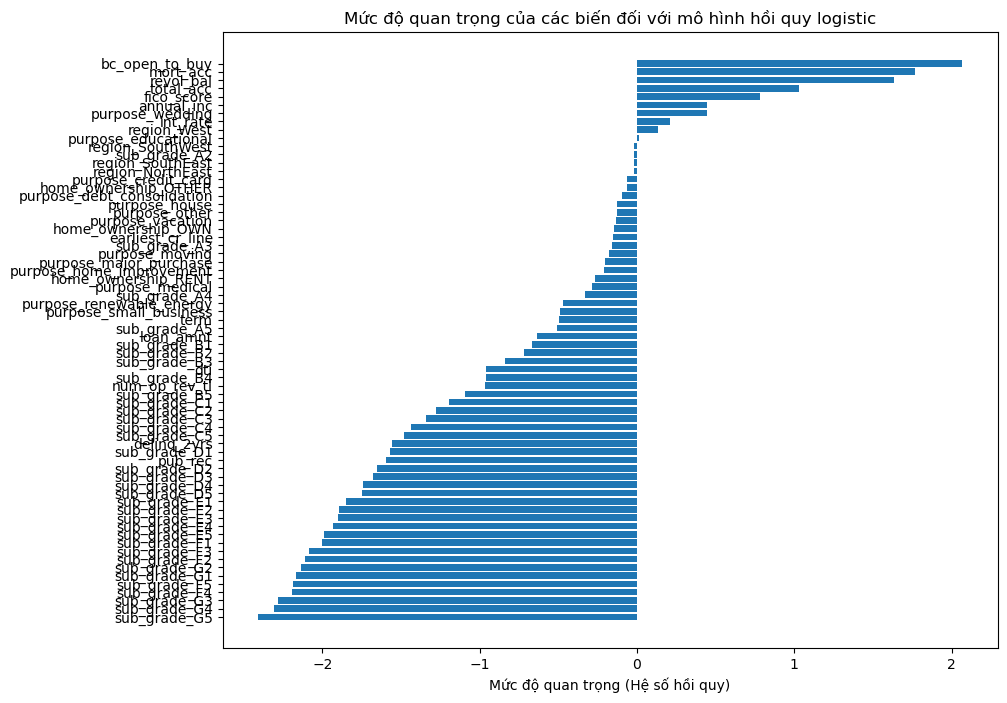

In [76]:
importances = model.coef_[0]
# Sắp xếp các biến theo mức độ quan trọng
indices = np.argsort(importances)[::-1]
sorted_features = [X.columns[i] for i in indices]
sorted_importances = importances[indices]

# Vẽ biểu đồ
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
plt.yticks(range(len(sorted_importances)), sorted_features)
plt.xlabel('Mức độ quan trọng (Hệ số hồi quy)')
plt.title('Mức độ quan trọng của các biến đối với mô hình hồi quy logistic')
plt.gca().invert_yaxis()  # Đảo ngược trục y để biến quan trọng nhất ở trên cùng
plt.show()

In [77]:
# Đánh giá kết quả mô hình
predictions = model.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, predictions))
print('Confusion matrix:')
print(confusion_matrix(y_test, predictions))

Accuracy score: 0.7993689680772086
Confusion matrix:
[[  3242  45020]
 [  2544 186266]]


Text(0.5, 427.9555555555555, 'Predicted label')

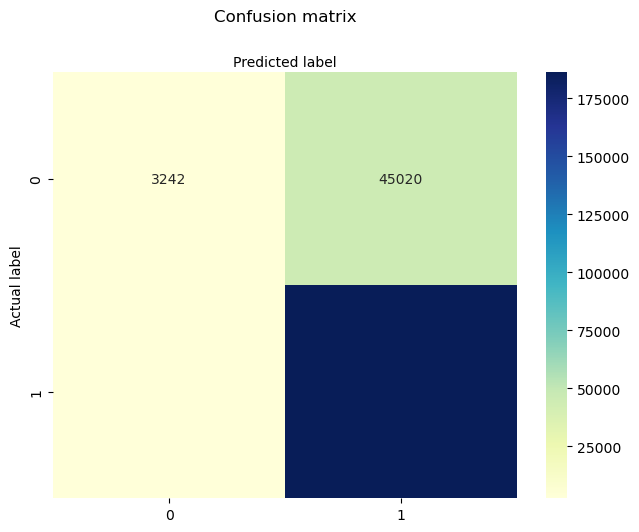

In [78]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# vẽ heatmap
cnf_matrix=confusion_matrix(y_test, predictions)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [79]:
from sklearn.metrics import classification_report
target_names = ['Bad Loan', 'Good Loan']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

    Bad Loan       0.56      0.07      0.12     48262
   Good Loan       0.81      0.99      0.89    188810

    accuracy                           0.80    237072
   macro avg       0.68      0.53      0.50    237072
weighted avg       0.76      0.80      0.73    237072



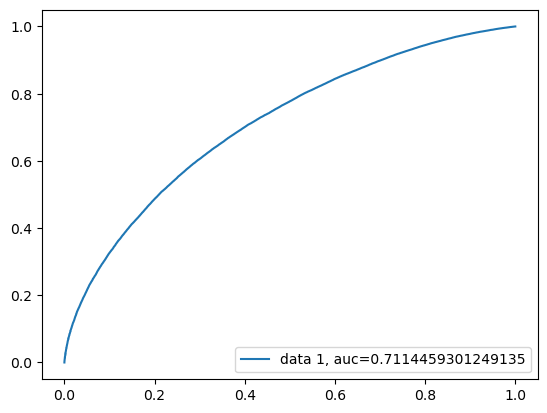

In [80]:
from sklearn import metrics

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [81]:
# Dự đoán xác suất
y_prob = model.predict_proba(X_test)[:, 1]

# Tạo một list các ngưỡng cắt có thể thử nghiệm
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    y_pred = (y_prob > threshold).astype(int)
    
    print(f"\nThreshold: {threshold}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Threshold: 0.1
Accuracy: 0.7964247148545589
Confusion Matrix:
[[     0  48262]
 [     0 188810]]


d:\Annaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Annaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Annaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     48262
           1       0.80      1.00      0.89    188810

    accuracy                           0.80    237072
   macro avg       0.40      0.50      0.44    237072
weighted avg       0.63      0.80      0.71    237072


Threshold: 0.2
Accuracy: 0.7964247148545589
Confusion Matrix:
[[     0  48262]
 [     0 188810]]


d:\Annaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Annaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Annaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     48262
           1       0.80      1.00      0.89    188810

    accuracy                           0.80    237072
   macro avg       0.40      0.50      0.44    237072
weighted avg       0.63      0.80      0.71    237072


Threshold: 0.3
Accuracy: 0.7964331511102113
Confusion Matrix:
[[     7  48255]
 [     5 188805]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.00      0.00     48262
           1       0.80      1.00      0.89    188810

    accuracy                           0.80    237072
   macro avg       0.69      0.50      0.44    237072
weighted avg       0.75      0.80      0.71    237072


Threshold: 0.4
Accuracy: 0.7972135047580482
Confusion Matrix:
[[   457  47805]
 [   270 188540]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63   

In [82]:
best_threshold = None
best_accuracy = 0.0

for threshold in thresholds:
    y_pred = (y_prob > threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best Accuracy: {best_accuracy}")

Best Threshold: 0.5
Best Accuracy: 0.7993689680772086


### Áp dụng Under sampling

In [83]:
# Import các thư viện
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler

In [84]:
X = df1.drop('loan_status', axis=1)
y = df1[['loan_status']]

In [85]:
from imblearn.under_sampling import RandomUnderSampler

# Tạo dữ liệu ví dụ (giả sử bạn đã có X và y)
X, y = make_classification(n_samples=1100000, n_features=20, n_classes=2,
                           weights=[0.79641199,0.20358801], flip_y=0,
                           random_state=42)

In [86]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# In tỷ lệ mẫu ban đầu
print("Tỷ lệ mẫu ban đầu:")
print("Good Loan:", sum(y_train == 0) / len(y_train))
print("Bad Loan:", sum(y_train == 1) / len(y_train))

Tỷ lệ mẫu ban đầu:
Good Loan: 0.7964988636363637
Bad Loan: 0.20350113636363637


In [88]:
# Sử dụng under-sampling trên tập train để giảm số lượng mẫu low risk
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

In [89]:
# In tỷ lệ mẫu sau khi sử dụng under-sampling
print("Tỷ lệ mẫu sau khi sử dụng under-sampling:")
print("Low risk:", sum(y_res == 0) / len(y_res))
print("High risk:", sum(y_res == 1) / len(y_res))

Tỷ lệ mẫu sau khi sử dụng under-sampling:
Low risk: 0.5
High risk: 0.5


In [90]:
# Huấn luyện mô hình
model = LogisticRegression()
model.fit(X_res, y_res)
model.coef_

array([[-1.41293950e-03, -4.86350020e-03, -6.54264104e-03,
        -7.32515551e-03,  4.57361209e-03, -2.34918281e-03,
        -6.30596487e-04,  1.78747162e-03, -1.07919132e+00,
         7.55121188e-03,  7.81312952e-03,  1.26207375e-01,
        -3.81179753e-03,  1.41347254e-02, -1.75829350e-03,
        -4.46818727e-01, -7.56030250e-03, -1.19661083e-03,
        -1.44391670e-03,  1.73858471e+00]])

In [91]:
# Dự đoán với tập kiểm tra
y_pred = model.predict(X_test)

In [92]:
# Đánh giá kết quả mô hình
predictions = model.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, predictions))
print('Confusion matrix:')
print(confusion_matrix(y_test, predictions))

Accuracy score: 0.8769090909090909
Confusion matrix:
[[153810  21324]
 [  5756  39110]]


Text(0.5, 427.9555555555555, 'Predicted label')

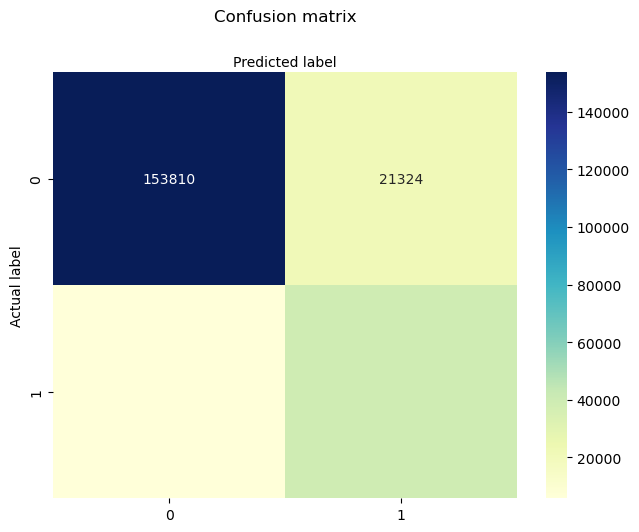

In [93]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# vẽ heatmap
cnf_matrix=confusion_matrix(y_test, predictions)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [94]:
from sklearn.metrics import classification_report
target_names = ['Bad Loan', 'Good Loan']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

    Bad Loan       0.96      0.88      0.92    175134
   Good Loan       0.65      0.87      0.74     44866

    accuracy                           0.88    220000
   macro avg       0.81      0.87      0.83    220000
weighted avg       0.90      0.88      0.88    220000



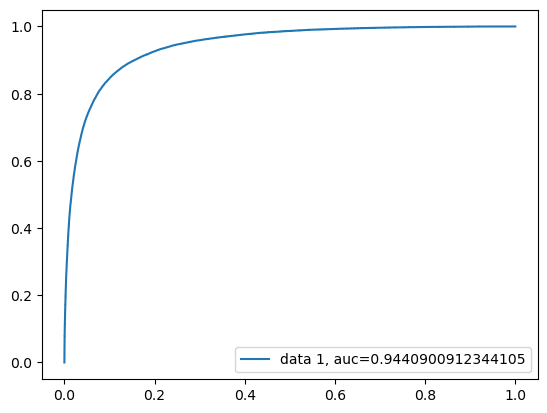

In [95]:
from sklearn import metrics

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [96]:
# Dự đoán xác suất
y_prob = model.predict_proba(X_test)[:, 1]

# Tạo một list các ngưỡng cắt có thể thử nghiệm
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for threshold in thresholds:
    y_pred = (y_prob > threshold).astype(int)
    
    print(f"\nThreshold: {threshold}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Threshold: 0.1
Accuracy: 0.6432
Confusion Matrix:
[[97454 77680]
 [  816 44050]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.56      0.71    175134
           1       0.36      0.98      0.53     44866

    accuracy                           0.64    220000
   macro avg       0.68      0.77      0.62    220000
weighted avg       0.86      0.64      0.68    220000


Threshold: 0.2
Accuracy: 0.7541636363636364
Confusion Matrix:
[[122897  52237]
 [  1847  43019]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.70      0.82    175134
           1       0.45      0.96      0.61     44866

    accuracy                           0.75    220000
   macro avg       0.72      0.83      0.72    220000
weighted avg       0.88      0.75      0.78    220000


Threshold: 0.3
Accuracy: 0.8147818181818182
Confusion Matrix:
[[137362  37772]
 [  2976  41890]]
Classification Report:

In [97]:
best_threshold = None
best_accuracy = 0.0

for threshold in thresholds:
    y_pred = (y_prob > threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Best Accuracy: {best_accuracy}")

Best Threshold: 0.8
Best Accuracy: 0.9056045454545455
